In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [97]:
equip = pd.read_csv("MedicalData-Equipment.csv", low_memory=False)
fraud =  pd.read_csv("MedicalData-Fraudulent.csv", low_memory=False)

In [98]:
equip.tail()

,Rfrg_NPI,Rfrg_Prvdr_Last_Name_Org,Rfrg_Prvdr_First_Name,Rfrg_Prvdr_MI,Rfrg_Prvdr_Crdntls,Rfrg_Prvdr_Gndr,Rfrg_Prvdr_Ent_Cd,Rfrg_Prvdr_St1,Rfrg_Prvdr_St2,Rfrg_Prvdr_City,...,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
1607430,1992999551,Molai,Indira,NaN,M.D.,F,I,625 E Grand Ave,NaN,Escondido,...,Standard wheelchair,Y,1,NaN,11,11,70.000,21.594545,15.152727,16.107273
1607431,1992999551,Molai,Indira,NaN,M.D.,F,I,625 E Grand Ave,NaN,Escondido,...,"Power wheelchair, group 2 standard, captains c...",Y,1,NaN,12,12,599.500,163.225000,116.300833,124.519167
1607432,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Portable gaseous oxygen system, rental; includ...",Y,2,NaN,12,14,48.250,16.380000,12.108571,13.732857
1607433,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Nebulizer, with compressor",Y,1,NaN,12,12,25.000,4.572500,3.631667,5.350000
1607434,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Oxygen concentrator, single delivery port, cap...",Y,2,NaN,13,14,291.095,74.630000,55.180714,67.935714


In [99]:
print(equip.describe())
print(equip.info())

           Rfrg_NPI  Rfrg_Prvdr_RUCA    Tot_Suplrs  Tot_Suplr_Benes  \
count  1.607435e+06     1.606495e+06  1.607435e+06    498362.000000   
mean   1.499718e+09     2.147233e+00  4.550089e+00        35.573543   
std    2.877204e+08     3.348553e+00  5.635538e+00        57.047603   
min    1.003000e+09     1.000000e+00  1.000000e+00        11.000000   
25%    1.255302e+09     1.000000e+00  1.000000e+00        13.000000   
50%    1.497926e+09     1.000000e+00  3.000000e+00        19.000000   
75%    1.740704e+09     2.000000e+00  5.000000e+00        33.000000   
max    1.993000e+09     9.900000e+01  2.150000e+02      2264.000000   

       Tot_Suplr_Clms  Tot_Suplr_Srvcs  Avg_Suplr_Sbmtd_Chrg  \
count    1.607435e+06     1.607435e+06          1.607435e+06   
mean     4.234110e+01     1.060145e+03          1.762388e+02   
std      9.246749e+01     1.462424e+04          4.978658e+02   
min      1.100000e+01     1.100000e+01          1.202899e-02   
25%      1.300000e+01     1.700000e+01  

<AxesSubplot:xlabel='Tot_Suplr_Clms', ylabel='Count'>

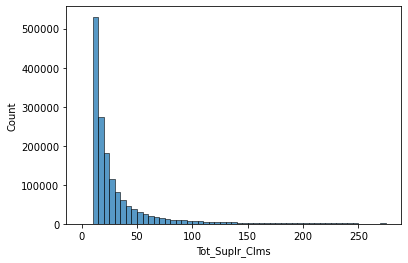

In [100]:
sns.histplot(data=equip, x="Tot_Suplr_Clms", binwidth=5, binrange=(0,np.percentile(equip["Tot_Suplr_Clms"], 98)))

In [94]:
n = 0
for x in equip: 
    for y in fraud: 
        if equip[x, "Rfrg_NPI"] == fraud[y, "NPI"]:
            sub1[n] = equip.loc
            n = n+1

KeyError: ('Rfrg_NPI', 'Rfrg_NPI')

In [91]:
sub = equip[equip["Rfrg_NPI"]==fraud["NPI"]]
sns.histplot(data=sub, x="Tot_Suplr_Clms", binwidth=5, binrange=(0,np.percentile(sub["Tot_Suplr_Clms"], 98)))

ValueError: Can only compare identically-labeled Series objects

In [101]:
phys = pd.read_csv("MedicalData-Physician.csv", low_memory=False)
pres =  pd.read_csv("MedicalData-Prescribers.csv", low_memory=False)

In [102]:
phys.tail()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
9449356,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Initial hospital inpatient care, typically 70 ...",N,F,38,38.0,38,672.500000,204.063684,165.252105,163.632105
9449357,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Subsequent hospital inpatient care, typically ...",N,F,117,183.0,183,313.150383,72.100164,58.218907,58.342732
9449358,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Subsequent hospital inpatient care, typically ...",N,F,268,480.0,480,377.822292,104.865021,85.974479,85.312313
9449359,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Hospital discharge day management, 30 minutes ...",N,F,11,11.0,11,243.363636,73.702727,60.284545,59.614545
9449360,1992999874,Joffe,Gabriella,NaN,NaN,F,I,5620 Brook Rd,NaN,Richmond,...,"Hospital discharge day management, more than 3...",N,F,132,133.0,133,432.654436,107.181654,86.784812,86.574211


<AxesSubplot:xlabel='Tot_Srvcs', ylabel='Count'>

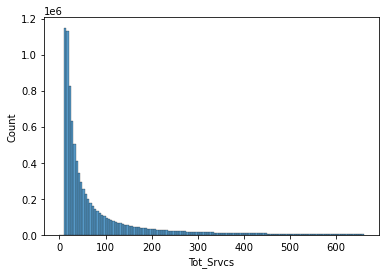

In [105]:
sns.histplot(data=phys, x="Tot_Srvcs", binwidth=5, binrange=(0,np.percentile(phys["Tot_Srvcs"], 96)))